In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [292]:
df = pd.read_csv('zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [293]:
X_df = df['Attendance'].values.reshape(-1,1)
Y = df['CapstoneScore'].values

Y_mean = np.mean(df['CapstoneScore'].values)
Y_std = np.std(df['CapstoneScore'].values)

X = (X_df - np.mean(X_df)) / np.std(X_df)
Y = (Y - np.mean(Y)) / np.std(Y)


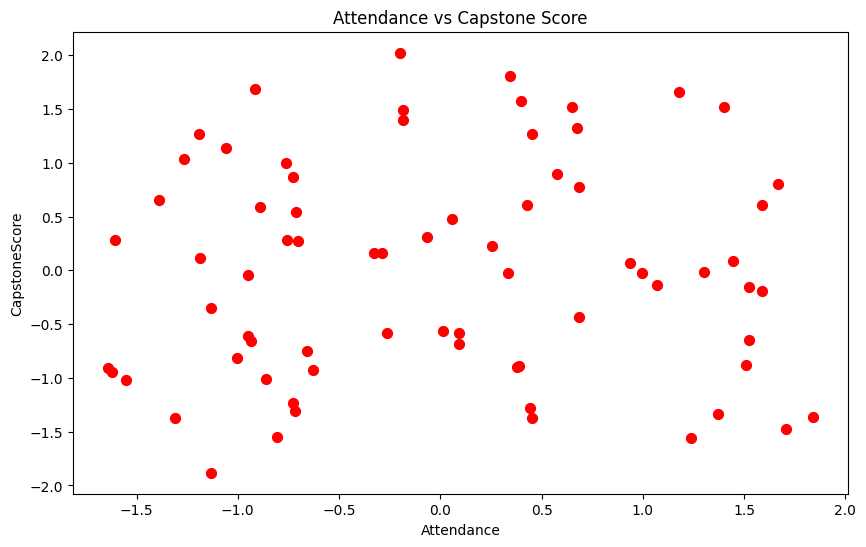

In [294]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='red',s=50)
plt.xlabel('Attendance')
plt.ylabel('CapstoneScore')
plt.title('Attendance vs Capstone Score')
plt.show()

In [295]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

In [296]:
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)
    cost_history=[]

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


In [297]:
X_with_bias = np.column_stack([np.ones(len(X)),X])
beta = np.random.randn(2)
n_iter = 1000
lr = 0.01

In [298]:
beta = gradient_descent(X_with_bias,Y,beta,n_iter,lr)

iteration: 0, beta:[0.28164202 0.58789563], cost:0.6890685654560971
iteration: 100, beta:[0.10309009 0.24042605], cost:0.5246451500337703
iteration: 200, beta:[0.03773431 0.11324095], cost:0.5026157542964514
iteration: 300, beta:[0.01381198 0.06668709], cost:0.4996642630182482
iteration: 400, beta:[0.00505563 0.04964687], cost:0.4992688231764484
iteration: 500, beta:[0.00185052 0.0434096 ], cost:0.4992158422750182
iteration: 600, beta:[0.00067735 0.04112655], cost:0.49920874391107084
iteration: 700, beta:[0.00024793 0.04029088], cost:0.4992077928745772
iteration: 800, beta:[9.07513568e-05 3.99850035e-02], cost:0.4992076654550169
iteration: 900, beta:[3.32179316e-05 3.98730410e-02], cost:0.49920764838338566


In [299]:
x_min,x_max = float(np.min(X)), float(np.max(X))
x_intervel = np.linspace(x_min,x_max,100)
x_intervel_with_bias = np.column_stack([np.ones((len(x_intervel))), x_intervel])
y_hat_intervel = x_intervel_with_bias.dot(beta)


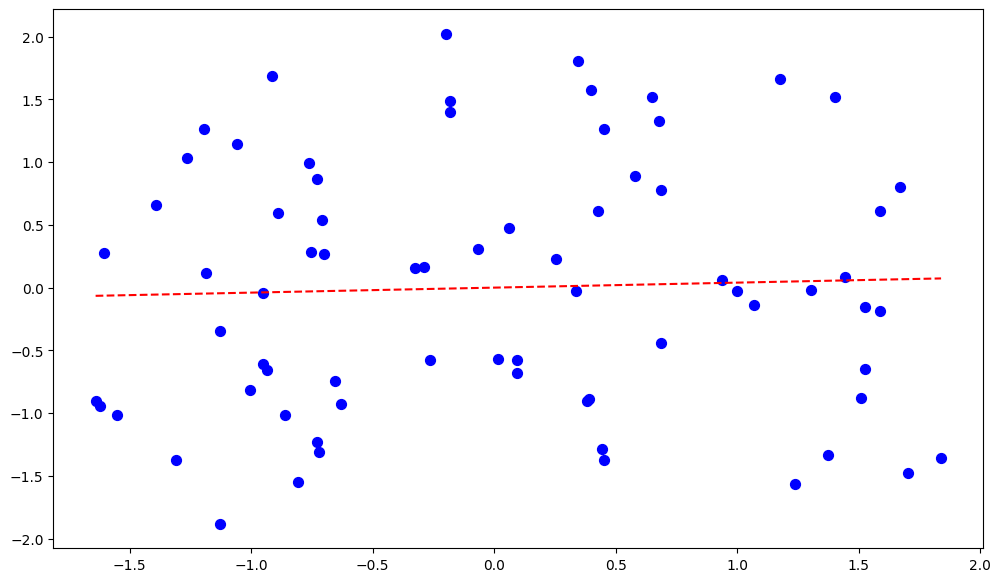

In [300]:
plt.figure(figsize=(12, 7))
plt.scatter(X, Y, color='blue', s=50)
plt.plot(x_intervel,y_hat_intervel,'r--', label="fitted line")
plt.show()

In [301]:
def Predict(x_raw):
    x_std = (x_raw - np.mean(X_df)) / np.std(X_df)

    X_input = np.array([1, x_std])
    y_std_pred = X_input.dot(beta)

    # Convert back to original Y scale
    y_original = y_std_pred * Y_std + Y_mean
    return y_original

In [302]:
Predict(83.2)

np.float64(55.370942260354084)

### Model Evaluation

In [303]:
Y_hat = X_with_bias.dot(beta) 
Y_hat

array([ 0.00378184, -0.00725971,  0.06326377,  0.01553576,  0.02728967,
       -0.00797207,  0.01767283,  0.03975594, -0.03717876,  0.06077052,
       -0.03789112, -0.0400282 , -0.06175513,  0.01339868, -0.00262938,
       -0.04501471,  0.05578401, -0.02863046, -0.04501471,  0.02693349,
       -0.03539787, -0.03432933, -0.05213829,  0.04687953,  0.02586496,
        0.05471547, -0.01046532, -0.03789112,  0.06077052, -0.06531692,
        0.01589194,  0.06005816,  0.04937278, -0.03005518, -0.01295858,
        0.01696048, -0.02898664, -0.02506867,  0.0678941 ,  0.00235713,
       -0.0638922 , -0.02898664,  0.01019307,  0.02301552, -0.03041136,
       -0.04715178,  0.05186604,  0.07323679, -0.02827428, -0.06460456,
       -0.05035739,  0.01517958, -0.0279181 , -0.04750796,  0.0575649 ,
        0.01802901, -0.04216527,  0.06326377, -0.00725971, -0.0553439 ,
       -0.03219225, -0.01153386, -0.02613721,  0.01375486,  0.00057623,
        0.02728967,  0.06646938,  0.03726269, -0.0364664 ,  0.00

In [304]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

In [305]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")

MSE : 0.9984152922066376
MAE : 0.8484952841781168
R2 Score : 0.0015847077933626164
